# **1. Perkenalan Dataset**


1. **Sumber Dataset**   
   [Bank Transaction Dataset for Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection?select=bank_transactions_data_2.csv)
   
2. **Deskripsi Dataset** \
   Dataset ini memberikan gambaran terperinci mengenai perilaku transaksional dan pola aktivitas keuangan, yang ideal untuk mengeksplorasi deteksi penipuan dan identifikasi anomali. Dataset ini berisi 2.512 sampel data transaksi, yang mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan. Setiap entri menawarkan wawasan yang komprehensif tentang perilaku transaksi, memungkinkan analisis untuk aplikasi keamanan keuangan dan deteksi penipuan.

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

In [3]:
# Load Dataset
df = pd.read_csv('bank_transactions_data_2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

In [6]:
# Melihat nama kolom dan jumlah nilai unik dari setiap kolom
column_uniques = df.nunique().sort_values(ascending=False)
column_uniques

TransactionID              2512
TransactionDate            2512
AccountBalance             2510
TransactionAmount          2455
DeviceID                    681
IP Address                  592
AccountID                   495
PreviousTransactionDate     360
TransactionDuration         288
MerchantID                  100
CustomerAge                  63
Location                     43
LoginAttempts                 5
CustomerOccupation            4
Channel                       3
TransactionType               2
dtype: int64

In [7]:
# Kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns

['TransactionAmount',
 'CustomerAge',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

In [8]:
# Kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols

['TransactionID',
 'AccountID',
 'TransactionDate',
 'TransactionType',
 'Location',
 'DeviceID',
 'IP Address',
 'MerchantID',
 'Channel',
 'CustomerOccupation',
 'PreviousTransactionDate']

In [9]:
unique_values_sample = {col: df[col].value_counts().head(5) for col in categorical_cols}
unique_values_sample

{'TransactionID': TransactionID
 TX002496    1
 TX002495    1
 TX002494    1
 TX002493    1
 TX002492    1
 Name: count, dtype: int64,
 'AccountID': AccountID
 AC00460    12
 AC00202    12
 AC00362    12
 AC00363    12
 AC00480    11
 Name: count, dtype: int64,
 'TransactionDate': TransactionDate
 2023-04-03 16:07:53    1
 2023-03-10 17:38:58    1
 2023-03-17 16:10:35    1
 2023-01-30 17:05:46    1
 2023-04-03 16:05:30    1
 Name: count, dtype: int64,
 'TransactionType': TransactionType
 Debit     1944
 Credit     568
 Name: count, dtype: int64,
 'Location': Location
 Fort Worth       70
 Los Angeles      69
 Oklahoma City    68
 Charlotte        68
 Philadelphia     67
 Name: count, dtype: int64,
 'DeviceID': DeviceID
 D000548    9
 D000142    9
 D000451    9
 D000697    9
 D000203    9
 Name: count, dtype: int64,
 'IP Address': IP Address
 200.136.146.93    13
 49.31.186.82      11
 173.135.78.201    10
 9.230.41.239      10
 166.79.195.157    10
 Name: count, dtype: int64,
 'Merchan

In [10]:
# Mengecek apakah terdapat data yang hilang
missing_values = df.isnull().sum()
missing_values

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [11]:
# Cek duplikasi data
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

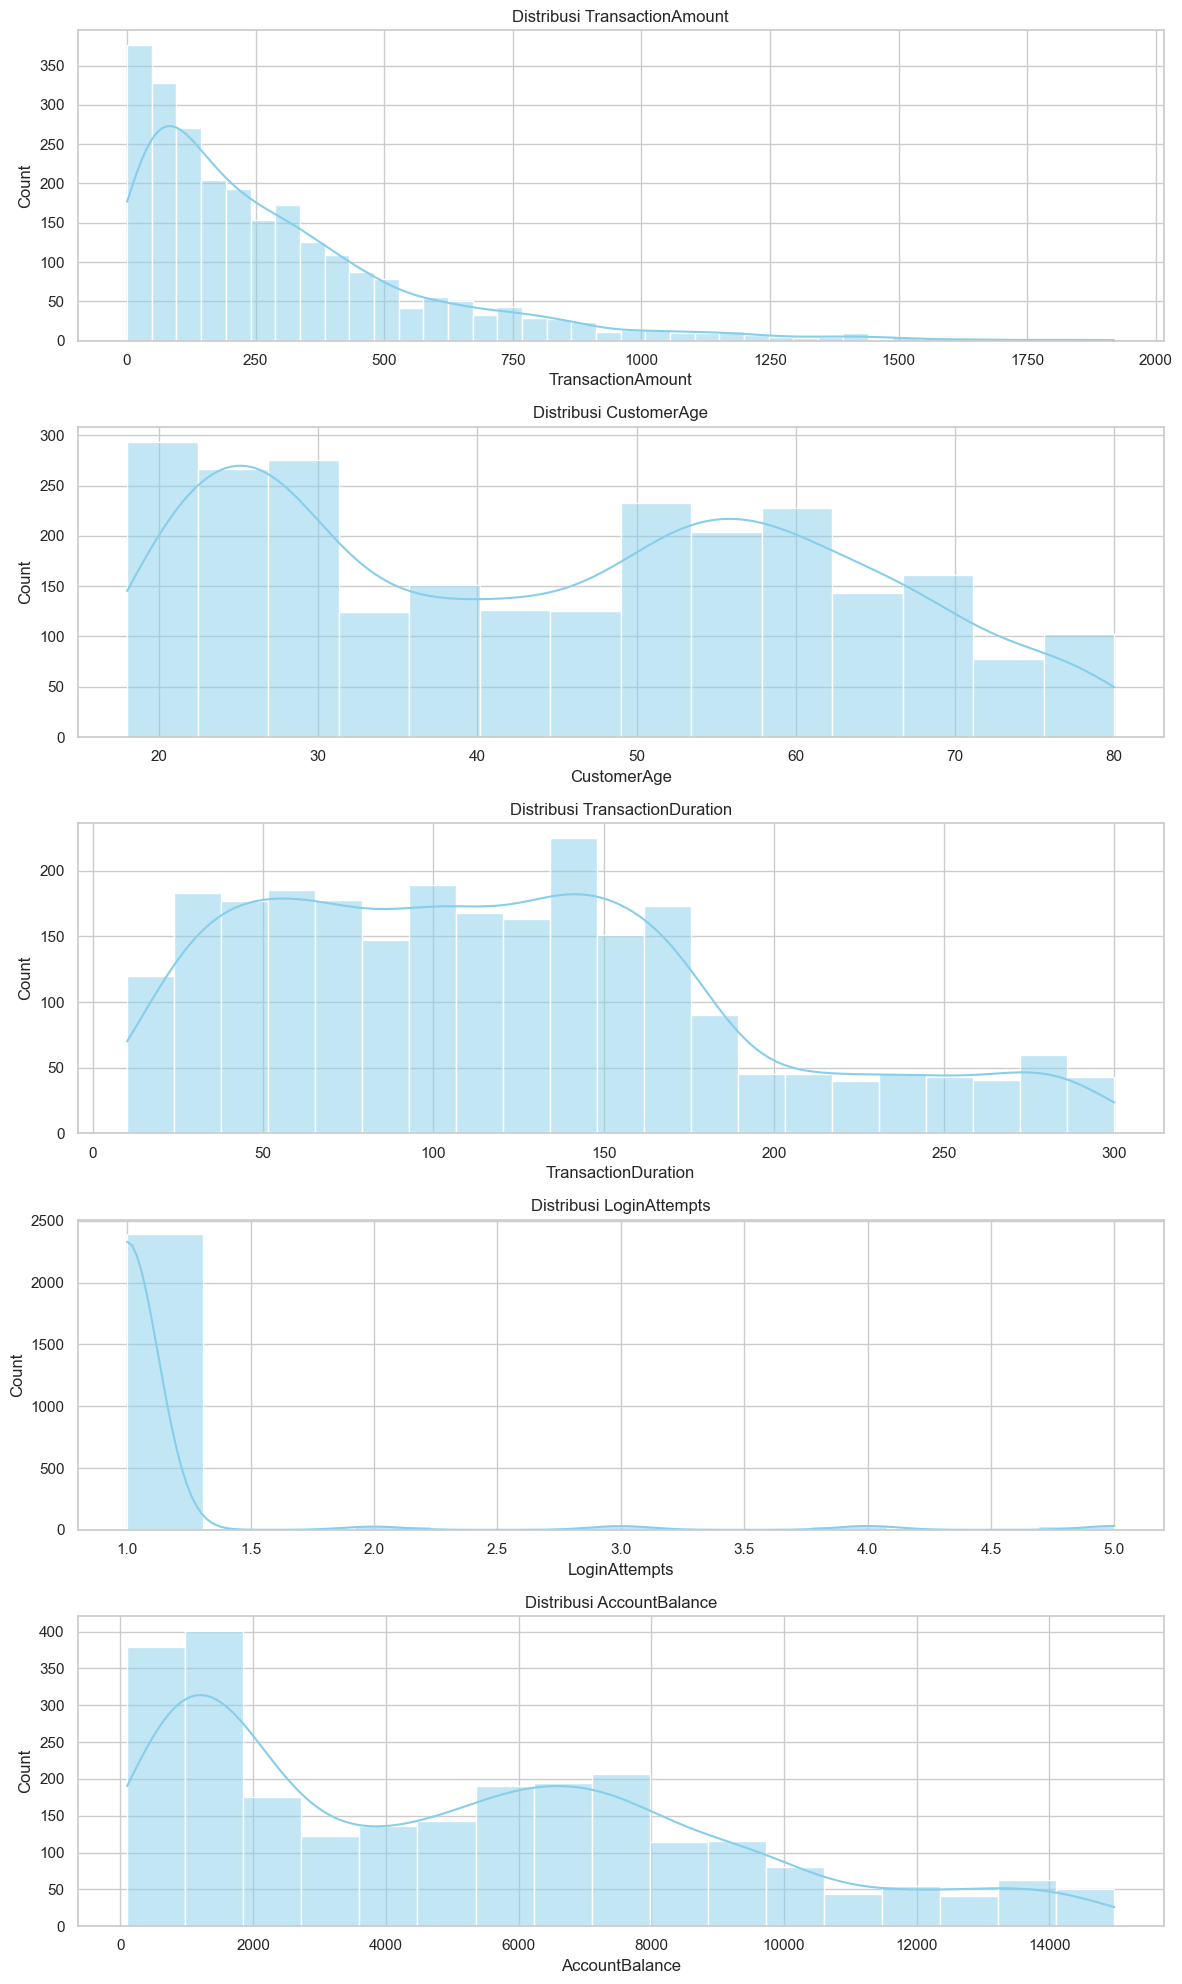

In [12]:
# Setup matplotlib style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Plot distribusi fitur numerik utama
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

fig, axs = plt.subplots(len(numeric_cols), 1, figsize=(12, 20))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axs[i], color='skyblue')
    axs[i].set_title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

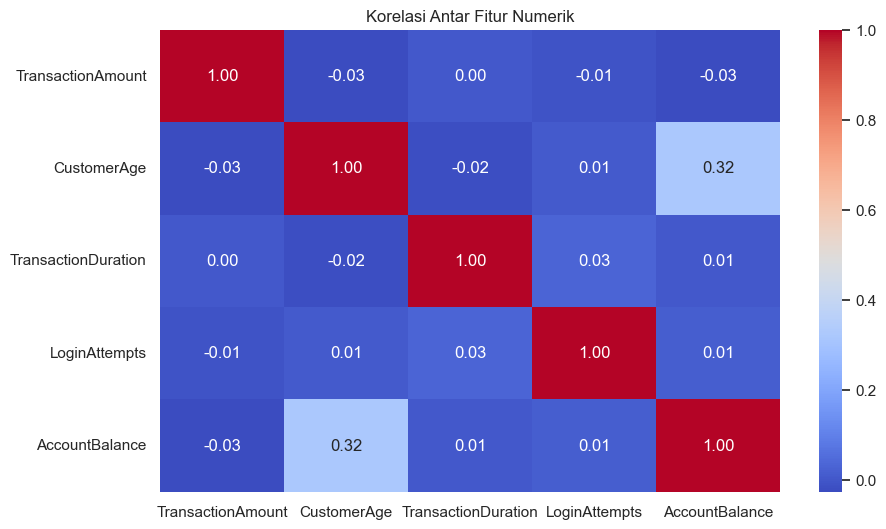

In [13]:
# Korelasi antar fitur numerik
correlation_matrix = df[numeric_cols].corr()

# Heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

C:\Users\Pandu\AppData\Local\Temp\ipykernel_10348\3874519368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Channel', y='TransactionAmount', ax=axs[0], palette='pastel')
C:\Users\Pandu\AppData\Local\Temp\ipykernel_10348\3874519368.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='CustomerOccupation', y='AccountBalance', ax=axs[1], palette='Set2')
C:\Users\Pandu\AppData\Local\Temp\ipykernel_10348\3874519368.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TransactionType', y='TransactionDuration

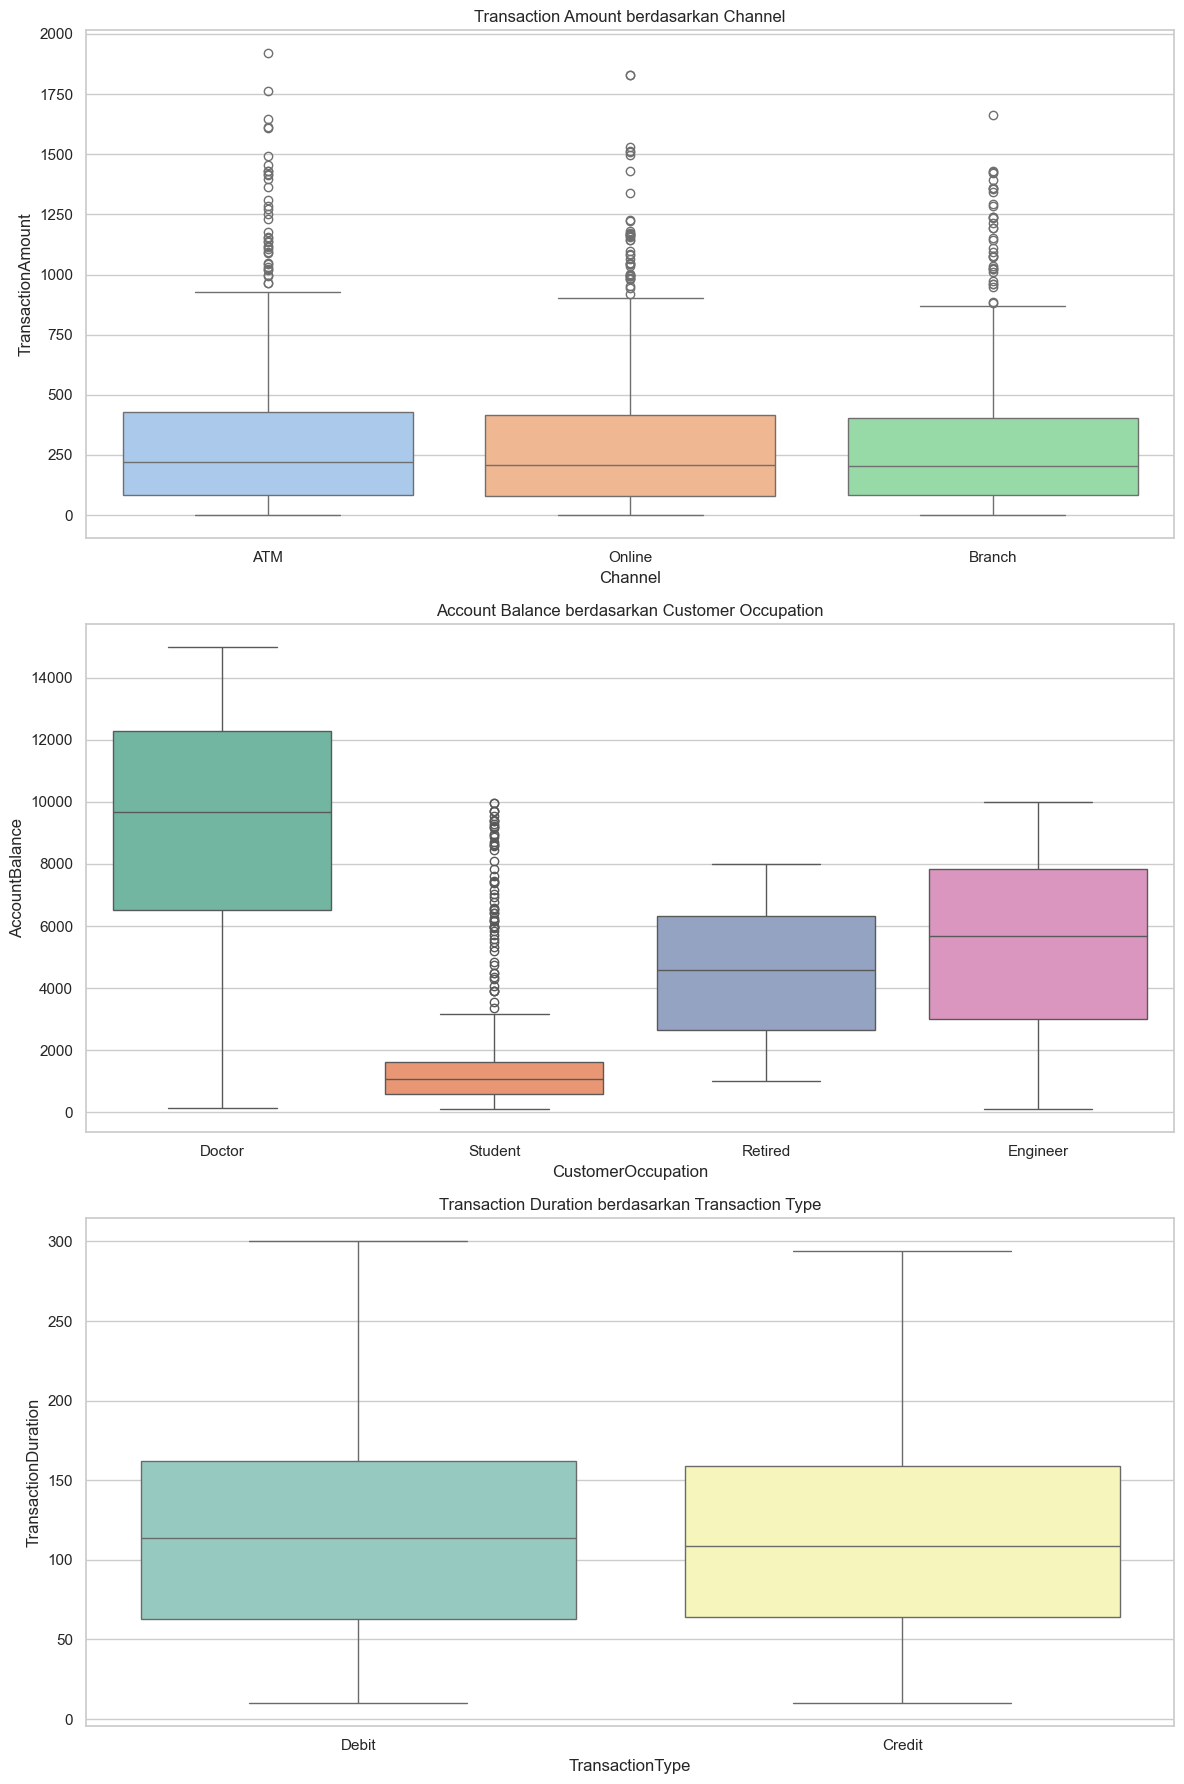

In [14]:
# Plot distribusi nilai numerik berdasarkan kategori

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# 1. TransactionAmount vs Channel
sns.boxplot(data=df, x='Channel', y='TransactionAmount', ax=axs[0], palette='pastel')
axs[0].set_title('Transaction Amount berdasarkan Channel')

# 2. AccountBalance vs CustomerOccupation
sns.boxplot(data=df, x='CustomerOccupation', y='AccountBalance', ax=axs[1], palette='Set2')
axs[1].set_title('Account Balance berdasarkan Customer Occupation')

# 3. TransactionDuration vs TransactionType
sns.boxplot(data=df, x='TransactionType', y='TransactionDuration', ax=axs[2], palette='Set3')
axs[2].set_title('Transaction Duration berdasarkan Transaction Type')

plt.tight_layout()
plt.show()

**Insight** 

1. **Struktur Data**
   - Dataset memiliki lebih dari 2000 baris dan 16 kolom  
   - Dalam dataset ini, terdapat fitur kategorikal seperti 'TransactionID', 'AccountID', 'TransactionType', 'Location', dan lainnya yang merepresentasikan label atau identitas tertentu. Selain itu, terdapat pula fitur numerik seperti 'TransactionAmount', 'CustomerAge', dan 'AccountBalance' yang berisi nilai angka dan dapat digunakan untuk analisis statistik. Klasifikasi ini penting untuk menentukan pendekatan analisis data yang sesuai.

2. **Data yang Hilang**  
   - Data yang digunakan tidak memiliki missing values.

3. **Analisis Distribusi dan Korelasi**  
   - Distribusi fitur numerik menunjukkan beberapa pola penting. **TransactionAmount** dan **AccountBalance** memiliki distribusi yang skew ke kanan, di mana sebagian besar pengguna melakukan transaksi kecil dan memiliki saldo rendah. **CustomerAge** bersifat multimodal, mengindikasikan keberadaan beberapa kelompok usia dominan dalam data. **TransactionDuration** relatif merata, menunjukkan variasi durasi transaksi yang luas. Sementara itu, **LoginAttempts** didominasi oleh satu percobaan, menandakan proses login yang umumnya langsung berhasil.  
   - Korelasi antara fitur menunjukkan bahwa **CustomerAge** memiliki hubungan positif sedang dengan **AccountBalance** sebesar 0.32, yang menandakan pengguna yang lebih tua cenderung memiliki saldo lebih besar. Hal ini mungkin mencerminkan akumulasi keuangan seiring bertambahnya usia. Sementara itu, fitur lain seperti **TransactionAmount**, **TransactionDuration**, dan **LoginAttempts** memiliki korelasi sangat lemah satu sama lain. Ini menunjukkan bahwa fitur-fitur tersebut bersifat independen dan masing-masing menyumbang informasi unik untuk analisis lebih lanjut.

4. **Visualisasi Data**  
   - Visualisasi menunjukkan bahwa **Transaction Amount** relatif seragam di ketiga kanal yakni ATM, Online, dan Branch, dengan median yang mirip dan sebaran nilai yang cukup lebar serta banyak outlier pada ketiganya. Untuk **Account Balance**, terdapat perbedaan yang signifikan antar profesi, di mana Doctor memiliki saldo tertinggi secara konsisten, sedangkan Student memiliki saldo paling rendah. Hal ini mencerminkan pengaruh status pekerjaan terhadap kemampuan finansial. Sementara itu, **Transaction Duration** antara tipe transaksi Debit dan Credit terlihat cukup seimbang, dengan rentang durasi yang serupa dan persebaran data yang simetris. Perbedaan ini menunjukkan bahwa jenis transaksi tidak terlalu memengaruhi durasi proses secara signifikan.

# **5. Data Preprocessing**

In [15]:
# Salin data agar tidak mengubah df asli
df_encoded = df.copy()

Encoding Data Kategorikal

In [16]:
categorical_cols = df_encoded.select_dtypes(include='object').columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Simpan encoder jika perlu inverse nanti

Normalisasi atau Standarisasi Fitur

In [17]:
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [18]:
# Lihat 5 baris pertama hasil preprocessing
df_encoded.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0,126,-0.971275,684,1,36,365,186,14,0,1.423718,0,-0.552443,-0.206794,-0.000537,105
1,1,450,0.269440,1192,1,15,50,82,51,0,1.311287,0,0.305314,-0.206794,2.216472,192
2,2,18,-0.586882,1276,1,23,229,343,8,2,-1.443277,3,-0.909842,-0.206794,-1.023534,41
3,3,68,-0.387456,823,1,33,182,300,1,2,-1.049768,3,-1.353017,-0.206794,0.885797,163
4,4,406,-0.973468,1959,0,1,298,501,90,2,-1.049768,3,1.120184,-0.206794,0.593589,16


In [19]:
# Ambil semua fitur numerik hasil preprocessing
all_features = df_encoded.drop(columns=['Cluster', 'PCA1', 'PCA2'], errors='ignore')

# Hitung korelasi absolut antar semua fitur
correlation_matrix_full = all_features.corr().abs()

# Segitiga atas dari matrix korelasi
upper_tri_full = correlation_matrix_full.where(np.triu(np.ones(correlation_matrix_full.shape), k=1).astype(bool))

# Ambil fitur dengan korelasi tinggi
to_drop_full = [column for column in upper_tri_full.columns if any(upper_tri_full[column] > 0.8)]

print("Fitur yang akan dibuang karena korelasi tinggi:", to_drop_full)

Fitur yang akan dibuang karena korelasi tinggi: []


In [20]:
# Dataset hasil feature selection
X_selected_full = all_features.drop(columns=to_drop_full)
X_selected_full.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0,126,-0.971275,684,1,36,365,186,14,0,1.423718,0,-0.552443,-0.206794,-0.000537,105
1,1,450,0.269440,1192,1,15,50,82,51,0,1.311287,0,0.305314,-0.206794,2.216472,192
2,2,18,-0.586882,1276,1,23,229,343,8,2,-1.443277,3,-0.909842,-0.206794,-1.023534,41
3,3,68,-0.387456,823,1,33,182,300,1,2,-1.049768,3,-1.353017,-0.206794,0.885797,163
4,4,406,-0.973468,1959,0,1,298,501,90,2,-1.049768,3,1.120184,-0.206794,0.593589,16


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [21]:
# Tentukan fitur yang digunakan untuk clustering
selected_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
X = df_encoded[selected_features]

In [22]:
# Model KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(X)

c:\Users\Pandu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Pandu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [23]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
df_encoded['PCA1'] = pca_components[:, 0]
df_encoded['PCA2'] = pca_components[:, 1]

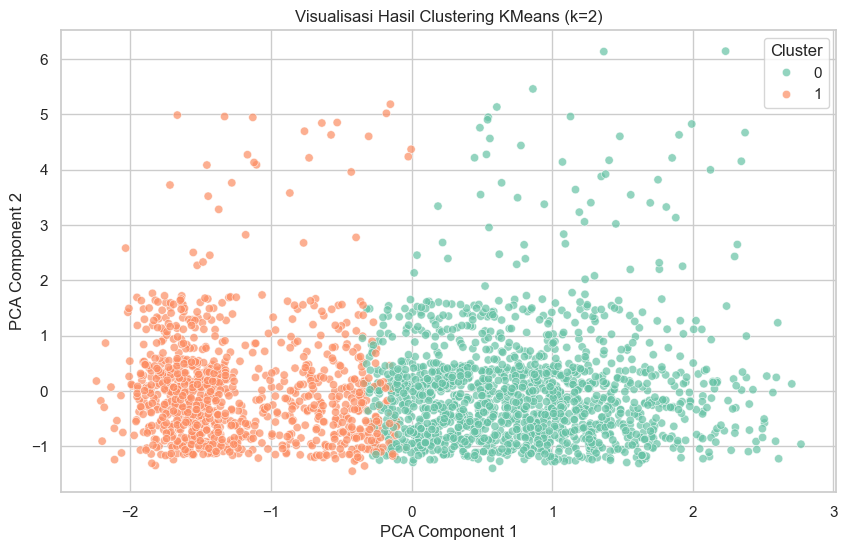

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('Visualisasi Hasil Clustering KMeans (k=2)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

## **b. Evaluasi Model Clustering**

In [25]:
cluster_range = range(2, 11)
inertias = []
silhouette_scores = []

In [26]:
X = df_encoded[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]

In [27]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    inertias.append(kmeans.inertia_)  # Untuk Elbow
    sil_score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(sil_score)

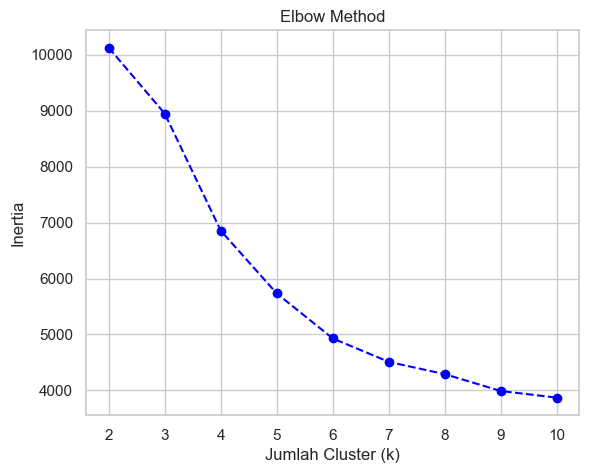

In [28]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertias, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)

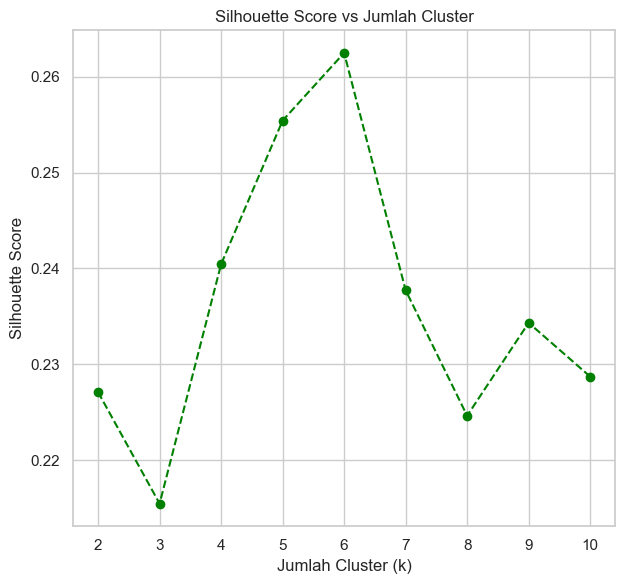

In [29]:
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

## **c. Feature Selection (Opsional)**

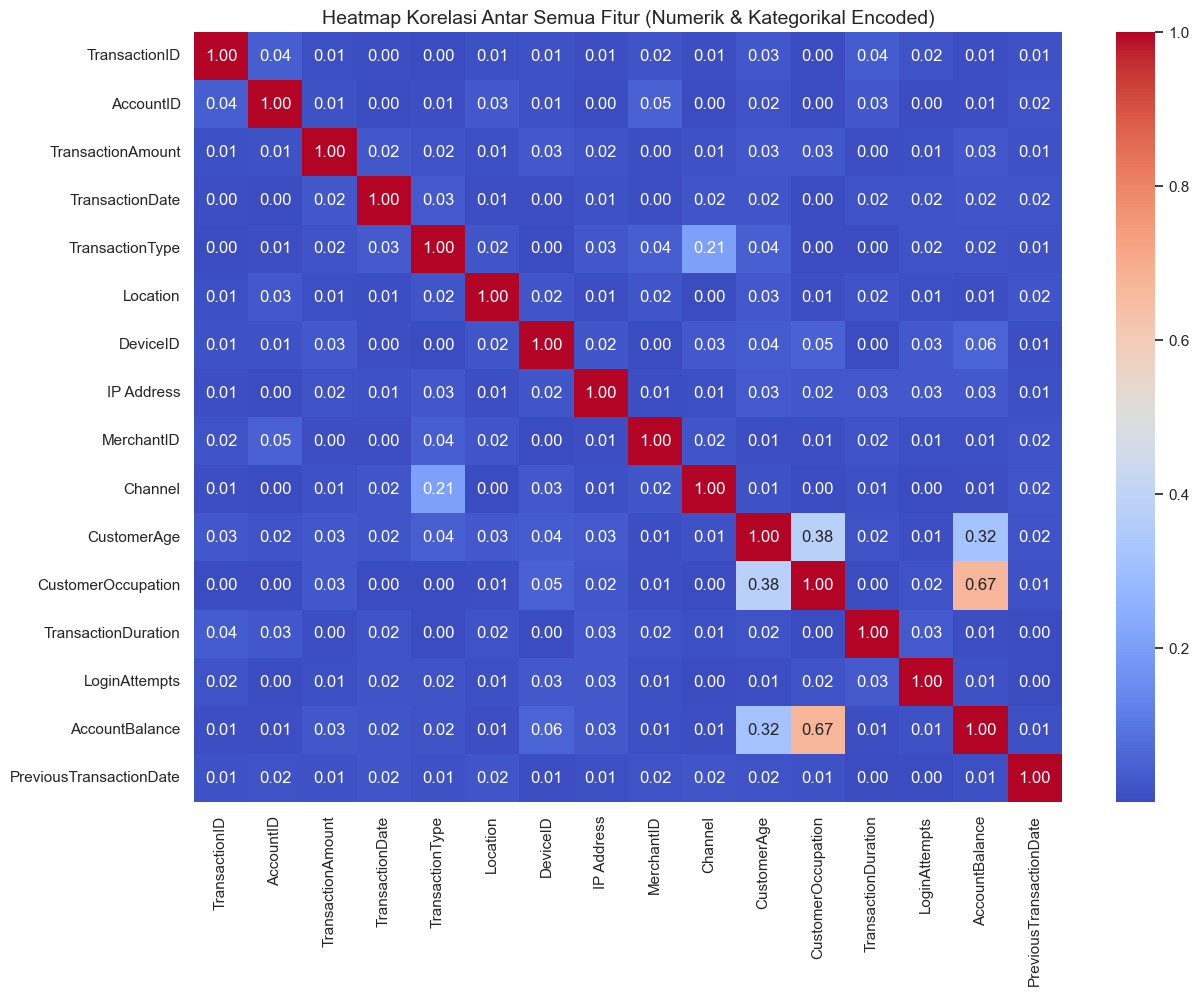

In [30]:
# Buat salinan fitur saja (tanpa 'Cluster' kalau sudah ada)
all_features_encoded = df_encoded.drop(columns=['Cluster', 'PCA1', 'PCA2'], errors='ignore')

# Hitung korelasi absolut antar semua fitur
corr_all = all_features_encoded.corr().abs()

# Visualisasi heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_all, annot=True, fmt=".2f", cmap='coolwarm')   
plt.title("Heatmap Korelasi Antar Semua Fitur (Numerik & Kategorikal Encoded)", fontsize=14)
plt.show()

Fitur yang terpilih

In [31]:
df_encoded_2 = df.copy()
categorical_cols = df_encoded_2.select_dtypes(include='object').columns.tolist()
label_encoders = {}

In [32]:
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_2[col] = le.fit_transform(df_encoded_2[col])
    label_encoders[col] = le

In [33]:
new_features = [
    'CustomerAge', 'AccountBalance', 'CustomerOccupation', 'Channel',
    'TransactionType', 'TransactionDuration', 'TransactionAmount'
]

Z-score Filtering dengan Threshold 1.0

In [34]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df_encoded_2[new_features]))
df_cleaned = df_encoded_2[(z_scores < 2).all(axis=1)].copy()
X_cleaned = df_cleaned[new_features]

In [35]:
kmeans_new = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans_new.fit_predict(X_cleaned)

In [36]:
sil_score = silhouette_score(X_cleaned, labels)
inertia = kmeans_new.inertia_

In [37]:
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Inertia: {inertia:.2f}")

Silhouette Score: 0.6510
Inertia: 6026848139.27


In [38]:
df_cleaned['Cluster_K2_Z2.0'] = labels

## **d. Visualisasi Hasil Clustering**

In [39]:
pca_new = PCA(n_components=2)
X_pca_new = pca_new.fit_transform(X_cleaned)

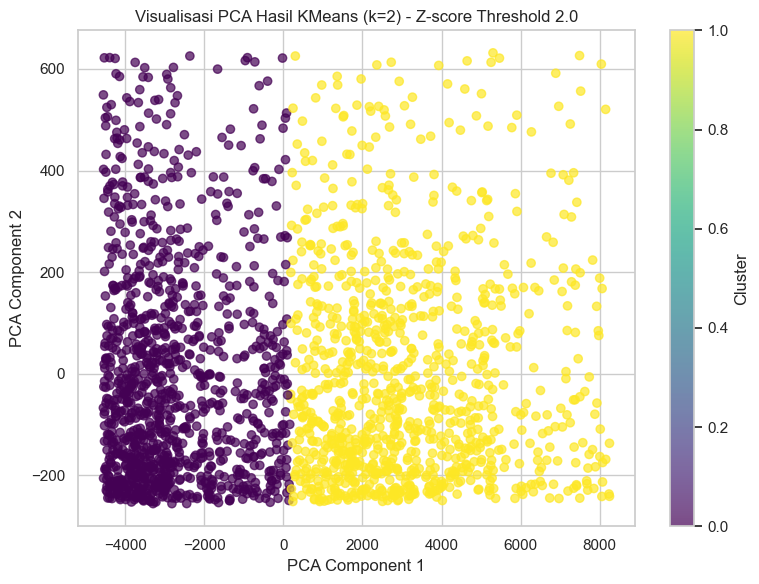

In [40]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca_new[:, 0],
    X_pca_new[:, 1],
    c=df_cleaned['Cluster_K2_Z2.0'],
    cmap='viridis',
    alpha=0.7
)
plt.title('Visualisasi PCA Hasil KMeans (k=2) - Z-score Threshold 2.0')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [41]:
# Salin data hasil clustering
df_clustered_final = df_cleaned.copy()
df_clustered_final['Cluster'] = df_clustered_final['Cluster_K2_Z2.0']

# Hitung rata-rata fitur numerik
numerical_summary_final = df_clustered_final.groupby('Cluster')[
    ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']
].mean().round(2)

# Ambil modus dari fitur kategorikal yang telah diencoding
categorical_summary_final = df_clustered_final.groupby('Cluster')[
    ['TransactionType', 'CustomerOccupation', 'Channel']
].agg(lambda x: x.value_counts().index[0])

# Gabungkan hasil numerik dan kategorikal
cluster_summary_final = pd.concat([numerical_summary_final, categorical_summary_final], axis=1)

# Hitung jumlah anggota tiap cluster
cluster_counts_final = df_clustered_final['Cluster'].value_counts().sort_index()

# Tampilkan hasil
print("=== Ringkasan Cluster ===")
print(cluster_summary_final)

print("\n=== Jumlah Anggota Tiap Cluster ===")
print(cluster_counts_final)

=== Ringkasan Cluster ===
         TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
Cluster                                                                        
0                   256.68        39.56               109.81         1868.34   
1                   249.96        50.19               110.67         7801.73   

         TransactionType  CustomerOccupation  Channel  
Cluster                                                
0                      1                   3        0  
1                      1                   0        1  

=== Jumlah Anggota Tiap Cluster ===
Cluster
0    1135
1    1003
Name: count, dtype: int64


Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Jumlah anggota:** 1135 pelanggan
- **Rata-rata Customer Age:** 39.56 
- **Rata-rata Transaction Amount:** 256.68
- **Rata-rata Transaction Duration:** 109.81
- **Rata-rata Account Balance:** 1868.34
- **Dominan CustomerOccupation:** 3
- **Dominan TransactionType:** 1
- **Dominan Channel:** 0
- **Analisis:** Cluster ini menggambarkan kelompok nasabah yang cenderung lebih muda, dengan saldo rekening yang relatif rendah. Meskipun demikian, mereka menunjukkan aktivitas transaksi yang cukup aktif baik dari sisi jumlah maupun durasi. Dominasi penggunaan channel transaksi tipe 0 mengindikasikan preferensi terhadap saluran offline seperti ATM atau teller bank. Berdasarkan pola tersebut, nasabah dalam cluster ini kemungkinan besar merupakan pekerja atau wirausaha muda yang memiliki rutinitas finansial cukup teratur, namun belum memiliki daya simpan yang besar. Karena karakteristiknya yang stabil dan konvensional, cluster ini sangat cocok dijadikan sebagai baseline atau profil perilaku normal dalam konteks deteksi anomali atau fraud.

## Cluster 1:
- **Jumlah anggota:** 1003 pelanggan  
- **Rata-rata Customer Age:** 50.19
- **Rata-rata Transaction Amount:** 249.96
- **Rata-rata Transaction Duration:** 110.67
- **Rata-rata Account Balance:** 7801.73
- **Dominan CustomerOccupation:** 0
- **Dominan TransactionType:** 1
- **Dominan Channel:** 1
- **Analisis:** Cluster ini terdiri dari nasabah yang lebih dewasa secara usia dan secara finansial lebih mapan, sebagaimana tercermin dari saldo rekening mereka yang jauh lebih tinggi dibandingkan cluster lainnya. Meskipun jumlah dan durasi transaksi tidak jauh berbeda, mereka cenderung melakukan transaksi melalui channel digital, seperti mobile banking atau internet banking, yang tercermin dari dominasi channel tipe 1. Profil ini menunjukkan perilaku transaksi yang efisien, cepat, dan minim interaksi langsung. Oleh karena itu, nasabah dalam cluster ini berpotensi termasuk dalam segmen digital-savvy atau nasabah prioritas, dengan kebiasaan finansial yang terekam rapi dan cenderung stabil dalam jangka panjang.



**Inverse Transform pada Data Target Setelah Clustering**

In [42]:
# Buang data yang tidak memiliki label (yaitu yang tidak lolos filtering)
df_labeled_only = df.loc[df_cleaned.index].copy()

# Inverse fitur numerik
df_labeled_only[numerical_cols] = scaler.inverse_transform(df_cleaned[numerical_cols])

# Inverse fitur kategorikal
for col in label_encoders:
    df_labeled_only[col] = label_encoders[col].inverse_transform(df_cleaned[col])

# Tambahkan hasil cluster
df_labeled_only['Cluster'] = df_cleaned['Cluster_K2_Z2.0'].values

# 🚀 Tambahkan label Fraud
df_labeled_only['FraudLabel'] = df_labeled_only['Cluster'].apply(lambda x: 1 if x == 0 else 0)

# Tampilkan hasil akhir
df_labeled_only.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,FraudLabel
0,TX000001,AC00128,4410.297491,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1289.879913,Doctor,5785.579512,1.727144,1.994358e+07,2024-11-04 08:08:08,1,0
2,TX000003,AC00019,37160.145372,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,382.658437,Student,4036.833771,1.727144,4.382466e+06,2024-11-04 08:07:04,0,1
3,TX000004,AC00070,54150.953261,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,507.179032,Student,1868.389053,1.727144,3.342587e+07,2024-11-04 08:09:06,1,0
4,TX000005,AC00411,4223.489090,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,507.179032,Student,13969.709579,1.727144,2.898101e+07,2024-11-04 08:06:39,1,0
5,TX000006,AC00393,27195.084707,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,364.869780,Student,12151.014009,1.727144,3.053796e+06,2024-11-04 08:06:36,0,1


# **7. Mengeksport Data**

In [43]:
# Simpan hasil akhir ke file CSV
df_labeled_only.to_csv('final_dataset_with_fraud_label.csv', index=False)